In [1]:
import pandas as pd
import numpy as np
import MDAnalysis
import warnings
import mdtraj as md
import os
import yaml
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

/home/utilizzatore/.local/lib/python3.10/site-packages/MDAnalysis/coordinates/chemfiles.py:82: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  from distutils.version import LooseVersion
/home/utilizzatore/.local/lib/python3.10/site-packages/MDAnalysis/coordinates/TRJ.py:1209: DeprecationWarning: Please use `netcdf_file` from the `scipy.io` namespace, the `scipy.io.netcdf` namespace is deprecated.
  class NCDFPicklable(scipy.io.netcdf.netcdf_file):


## Fig S7

In [5]:
cluster_populations = pd.read_csv('Clusters_populations.csv', delimiter=',', on_bad_lines='skip',
                                   names=['Dye', 'Cutoff', 'Population'])

[None, None, None, None, None, None]

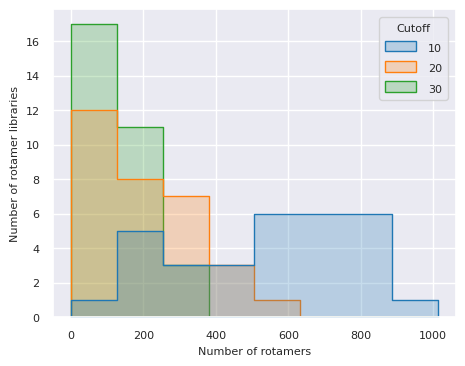

In [4]:
sns.set(rc={'figure.figsize':(5.2, 4)})


g = sns.histplot(data=cluster_populations, x="Population", hue="Cutoff", 
             element="step", palette='tab10', legend=True)

ax = g.axes

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(8)
        
g.set_xlabel('Number of rotamers', size=8)
g.set_ylabel('Number of rotamer libraries', size=8)

plt.setp(ax.get_legend().get_title(), fontsize='8')
plt.setp(ax.get_legend().get_texts(), fontsize='8')

# ax.tight_layout()

# plt.savefig('Cluster_populations.png', dpi=400)

## Fig S4

In [7]:
# Define Universe

# Usare O91 x AlexaFluor
structures_alexa = ['A35_C1R', 'A48_C1R', 'A53_C1R', 'A56_C1R', 'A59_C1R', 'A64_C2R', 
                   'A35_L1R', 'A48_L1R', 'A48_B1R', 'A53_L1R', 'A56_L1R', 'A59_L1R', 'A64_L1R']

# Usare C7 x ATTO
structures_atto = ['T39_C2R', 'T39_L1R', 'T42_C2R', 'T42_L1R', 'T46_L1R', 'T46_C2R', 'T48_C3R', 
                   'T49_C2R', 'T49_L1R', 'T52_C2R', 'T52_L1R', 'T61_C2R', 'T61_L1R', 'Tth_C3R']

# C10 x Lumiprobe
structures_lumiprobe = ['C3N_C2R', 'C55_C2R', 'C55_L1R', 'C75_L1R']

structures = structures_alexa + structures_atto + structures_lumiprobe

x, y, z = [], [], []

name, manufacturer, linker = [], [], []

for structure in structures:
    
    u = MDAnalysis.Universe(f'lib/{structure}.gro', f'lib/{structure}.xtc')
    
    if structure[0] == 'A': 
        
        pos = u.select_atoms('all and not (resname ACE or resname NHE) and name O91')

    elif structure[0] == 'T': 
        
        pos = u.select_atoms('all and not (resname ACE or resname NHE) and name C7')
        
    elif structure[0] == 'C': 
        
        pos = u.select_atoms('all and not (resname ACE or resname NHE) and name C10')
    
    for _ in u.trajectory:
    
        x.append(pos.positions[0][0])
        y.append(pos.positions[0][1])
        z.append(pos.positions[0][2])

    name = np.append(name, np.repeat(structure, len(u.trajectory)))
    linker = np.append(linker, np.repeat(structure[4:7], len(u.trajectory)))
    
    if structure[0] == 'A':
        
        manufacturer = np.append(manufacturer, np.repeat('AlexaFluor', len(u.trajectory)))
    
    elif structure[0] == 'T':
        
        manufacturer = np.append(manufacturer, np.repeat('ATTO', len(u.trajectory)))
        
    elif structure[0] == 'C':
        
        manufacturer = np.append(manufacturer, np.repeat('Lumiprobe', len(u.trajectory)))
        
positions_df = pd.DataFrame({'Name': name, 'Manufacturer': manufacturer, 'Linker': linker,
                                 'x': x, 'y': y, 'z': z})

Exception ignored in: <function ReaderBase.__del__ at 0x7faa84452200>
Traceback (most recent call last):
  File "/home/utilizzatore/.local/lib/python3.10/site-packages/MDAnalysis/coordinates/base.py", line 2180, in __del__
    self.close()
  File "/home/utilizzatore/.local/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py", line 165, in close
    self._file.close()
AttributeError: 'DCDReader' object has no attribute '_file'


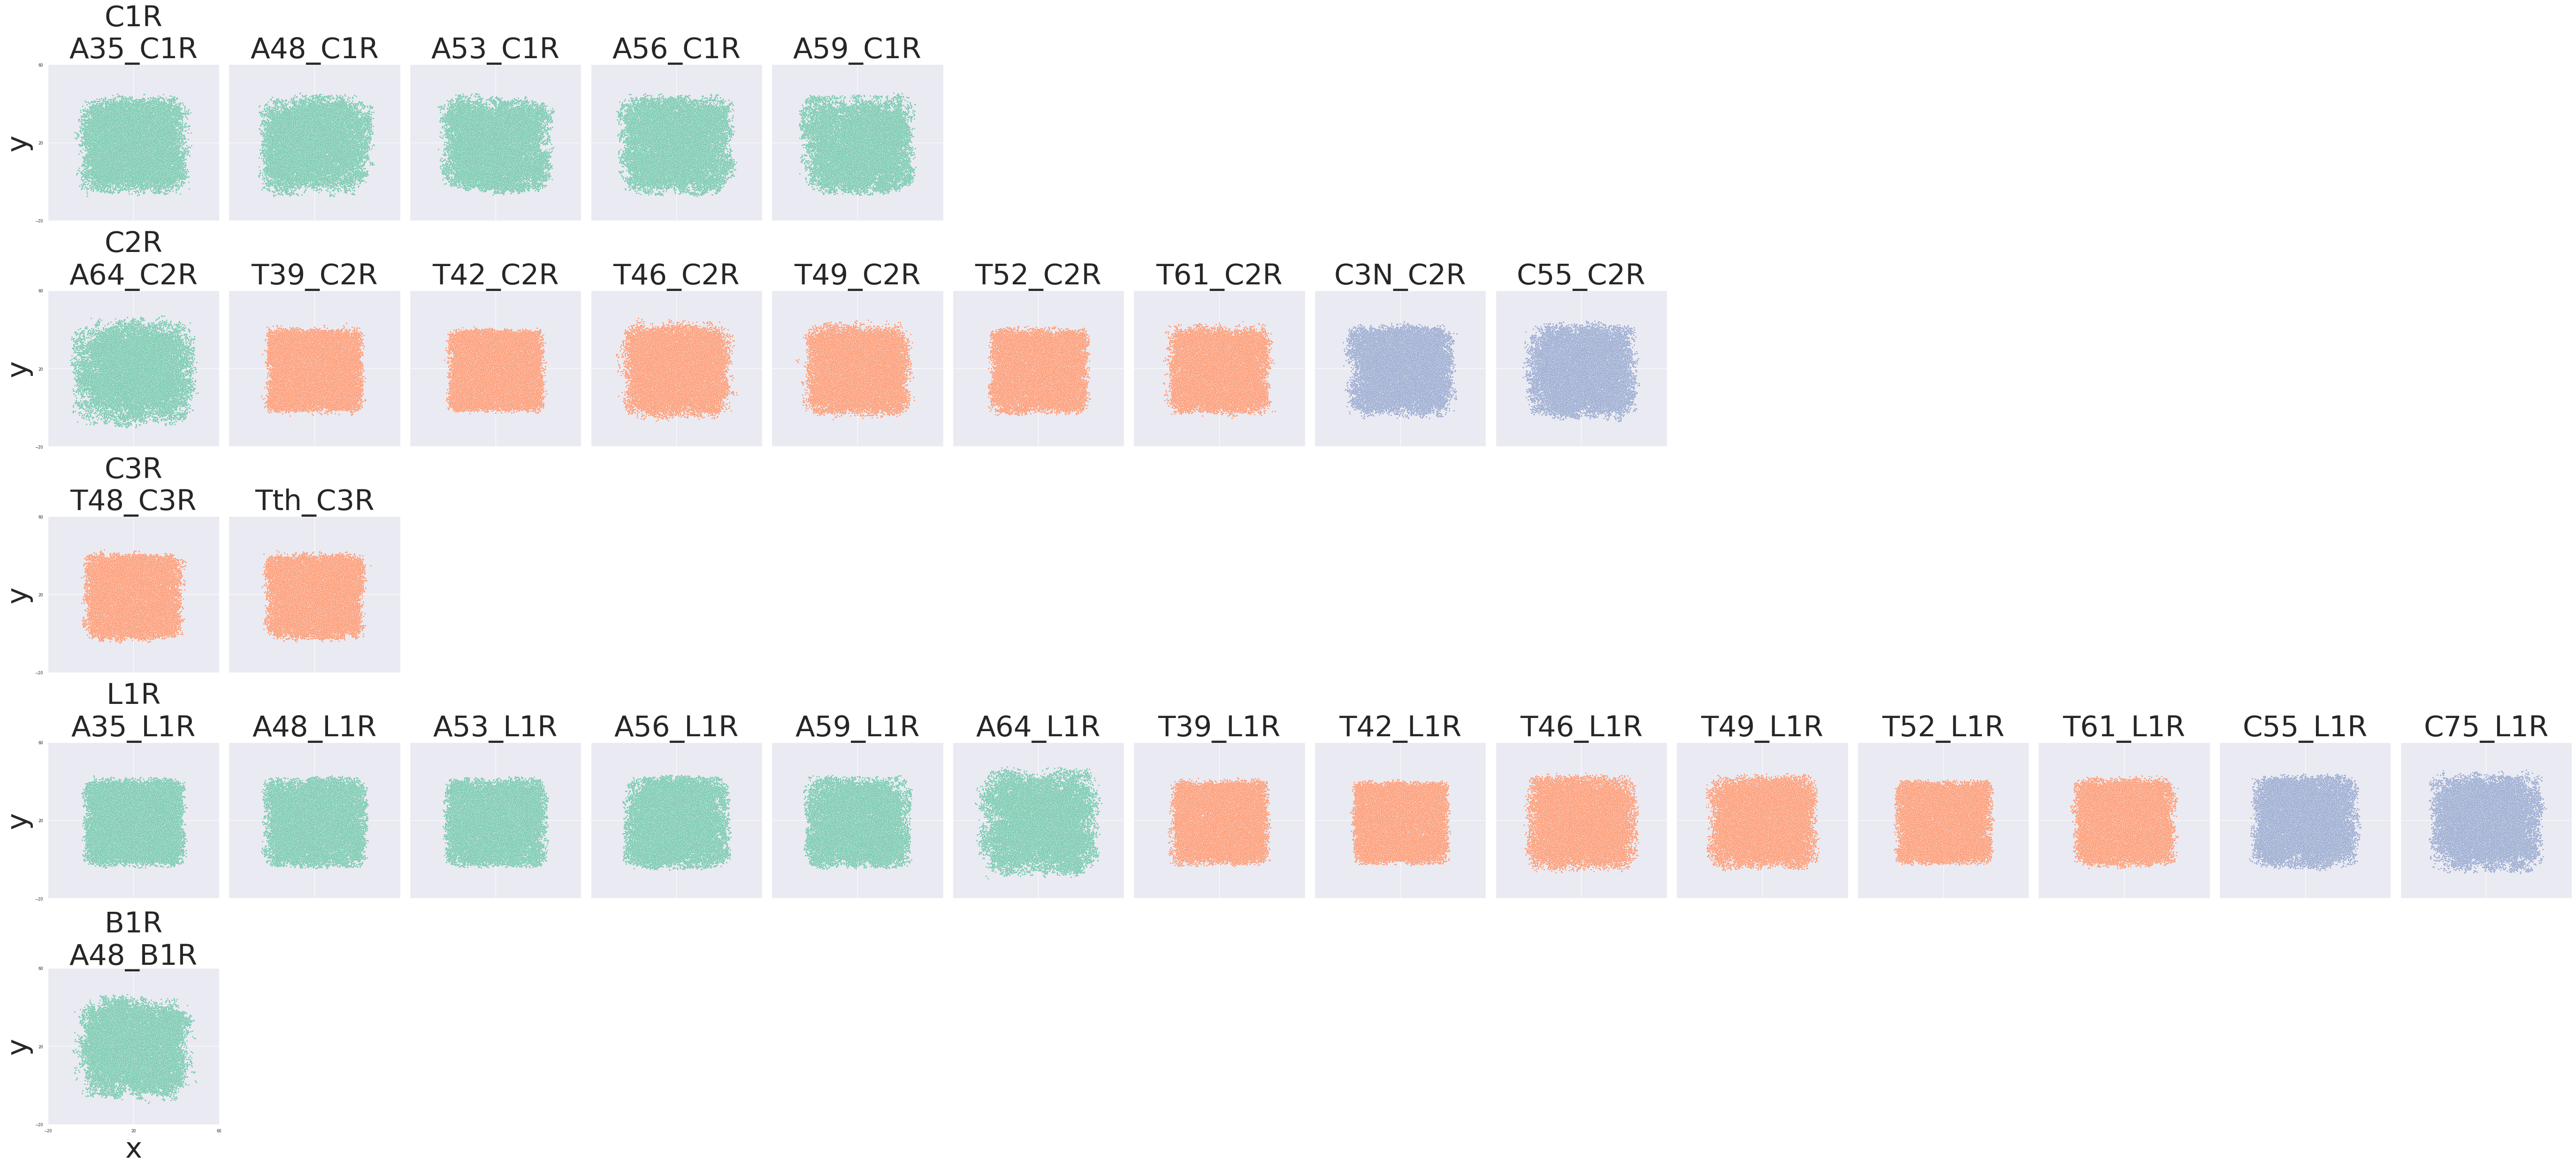

In [8]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(5, 14, figsize=(55, 25), sharex=True, sharey=True)

C1 = 0
C2 = 0
C3 = 0
L = 0
B = 0

palette = sns.color_palette("Set2", 3)


for structure in structures:
    
#     Select color
    if structure[0] == 'A':
        color = palette[0]
        
    elif structure[0] == 'T':
        color = palette[1]
        
    elif structure[0] == 'C':
        color = palette[2]
    
        
    if structure[4:6] == 'C1':
        
        sns.scatterplot(data=positions_df.loc[positions_df['Name'] == structure], 
                        x="x", y="y", color=color, ax=ax[0, C1], s=5)
        
        ax[0, C1].set_title(structure, size=44)
        ax[0, 0].set_title(f'C1R\nA35_C1R', size=44)
        
        C1 += 1
        
    if structure[4:6] == 'C2':
        
        sns.scatterplot(data=positions_df.loc[positions_df['Name'] == structure], 
                        x="x", y="y", color=color, ax=ax[1, C2], s=5)
        
        ax[1, C2].set_title(structure, size=44)
        ax[1, 0].set_title(f'C2R\nA64_C2R', size=44)
        
        C2 += 1
        
    if structure[4:6] == 'C3':
        
        sns.scatterplot(data=positions_df.loc[positions_df['Name'] == structure], 
                        x="x", y="y", color=color, ax=ax[2, C3], s=5)
        
        ax[2, C3].set_title(structure, size=44)
        ax[2, 0].set_title(f'C3R\nT48_C3R', size=44)
        
        C3 += 1
        
    elif structure[4] == 'L':
        
        sns.scatterplot(data=positions_df.loc[positions_df['Name'] == structure], 
                        x="x", y="y", color=color, ax=ax[3, L], s=5)
        
        ax[3, L].set_title(structure, size=44)
        ax[3, 0].set_title(f'L1R\nA35_L1R', size=44)

        
        L += 1
        
    
    elif structure[4] == 'B':
        
        sns.scatterplot(data=positions_df.loc[positions_df['Name'] == structure], 
                        x="x", y="y", color=color, ax=ax[4, B], s=5)
        
        ax[4, 0].set_title(f'B1R\n{structure}', size=44)
        
        B += 1

for rows in range(0, 5):
    for cols in range(0, 14):
        
        ax[rows, cols].set_xlabel('x', fontsize=44)
        ax[rows, 0].set_ylabel('y', fontsize=44)
        
        for label in (ax[rows, cols].get_xticklabels() + ax[rows, cols].get_yticklabels()):
            label.set_fontsize(6)
            
for i in range(5, 14):
    ax[0, i].axis('off')
    
for i in range(9, 14):
    ax[1, i].axis('off')
    
for i in range(2, 14):
    ax[2, i].axis('off')
    
for i in range(1, 14):
    ax[4, i].axis('off')

plt.xticks(np.arange(-20, 70, step=40)) 
plt.yticks(np.arange(-20, 70, step=40))    

fig.tight_layout()

# plt.savefig('Rotamer_libraries_scatterplot_traj.png', dpi=320)

## Fig 1

In [5]:
# Define Universe

# Usare O91 x AlexaFluor
structures_alexa = ['A35_C1R', 'A48_C1R', 'A53_C1R', 'A56_C1R', 'A59_C1R', 'A64_C2R', 
                   'A35_L1R', 'A48_L1R', 'A48_B1R', 'A53_L1R', 'A56_L1R', 'A59_L1R', 'A64_L1R']

# Usare C7 x ATTO
structures_atto = ['T39_C2R', 'T39_L1R', 'T42_C2R', 'T42_L1R', 'T46_L1R', 'T46_C2R', 'T48_C3R', 
                   'T49_C2R', 'T49_L1R', 'T52_C2R', 'T52_L1R', 'T61_C2R', 'T61_L1R', 'Tth_C3R']


structures_lumiprobe = ['C3N_C2R', 'C55_C2R', 'C55_L1R', 'C75_L1R']

structures = structures_alexa + structures_atto + structures_lumiprobe

x, y, z = [], [], []

name, manufacturer, linker = [], [], []

for structure in structures:
    
    u = MDAnalysis.Universe(f'lib/{structure}.pdb', f'lib/{structure}_cutoff10.dcd')
    
    if structure[0] == 'A': 
        
        pos = u.select_atoms('all and not (resname ACE or resname NHE) and name O91')

    elif structure[0] == 'T': 
        
        pos = u.select_atoms('all and not (resname ACE or resname NHE) and name C7')
        
    elif structure[0] == 'C': 
        
        pos = u.select_atoms('all and not (resname ACE or resname NHE) and name C10')
    
    for _ in u.trajectory:
    
        x.append(pos.positions[0][0])
        y.append(pos.positions[0][1])
        z.append(pos.positions[0][2])

    name = np.append(name, np.repeat(structure, len(u.trajectory)))
    linker = np.append(linker, np.repeat(structure[4:7], len(u.trajectory)))
    
    if structure[0] == 'A':
        
        manufacturer = np.append(manufacturer, np.repeat('AlexaFluor', len(u.trajectory)))
    
    elif structure[0] == 'T':
        
        manufacturer = np.append(manufacturer, np.repeat('ATTO', len(u.trajectory)))
        
    elif structure[0] == 'C':
        
        manufacturer = np.append(manufacturer, np.repeat('Lumiprobe', len(u.trajectory)))
        
positions_df = pd.DataFrame({'Name': name, 'Manufacturer': manufacturer, 'Linker': linker,
                                 'x': x, 'y': y, 'z': z})

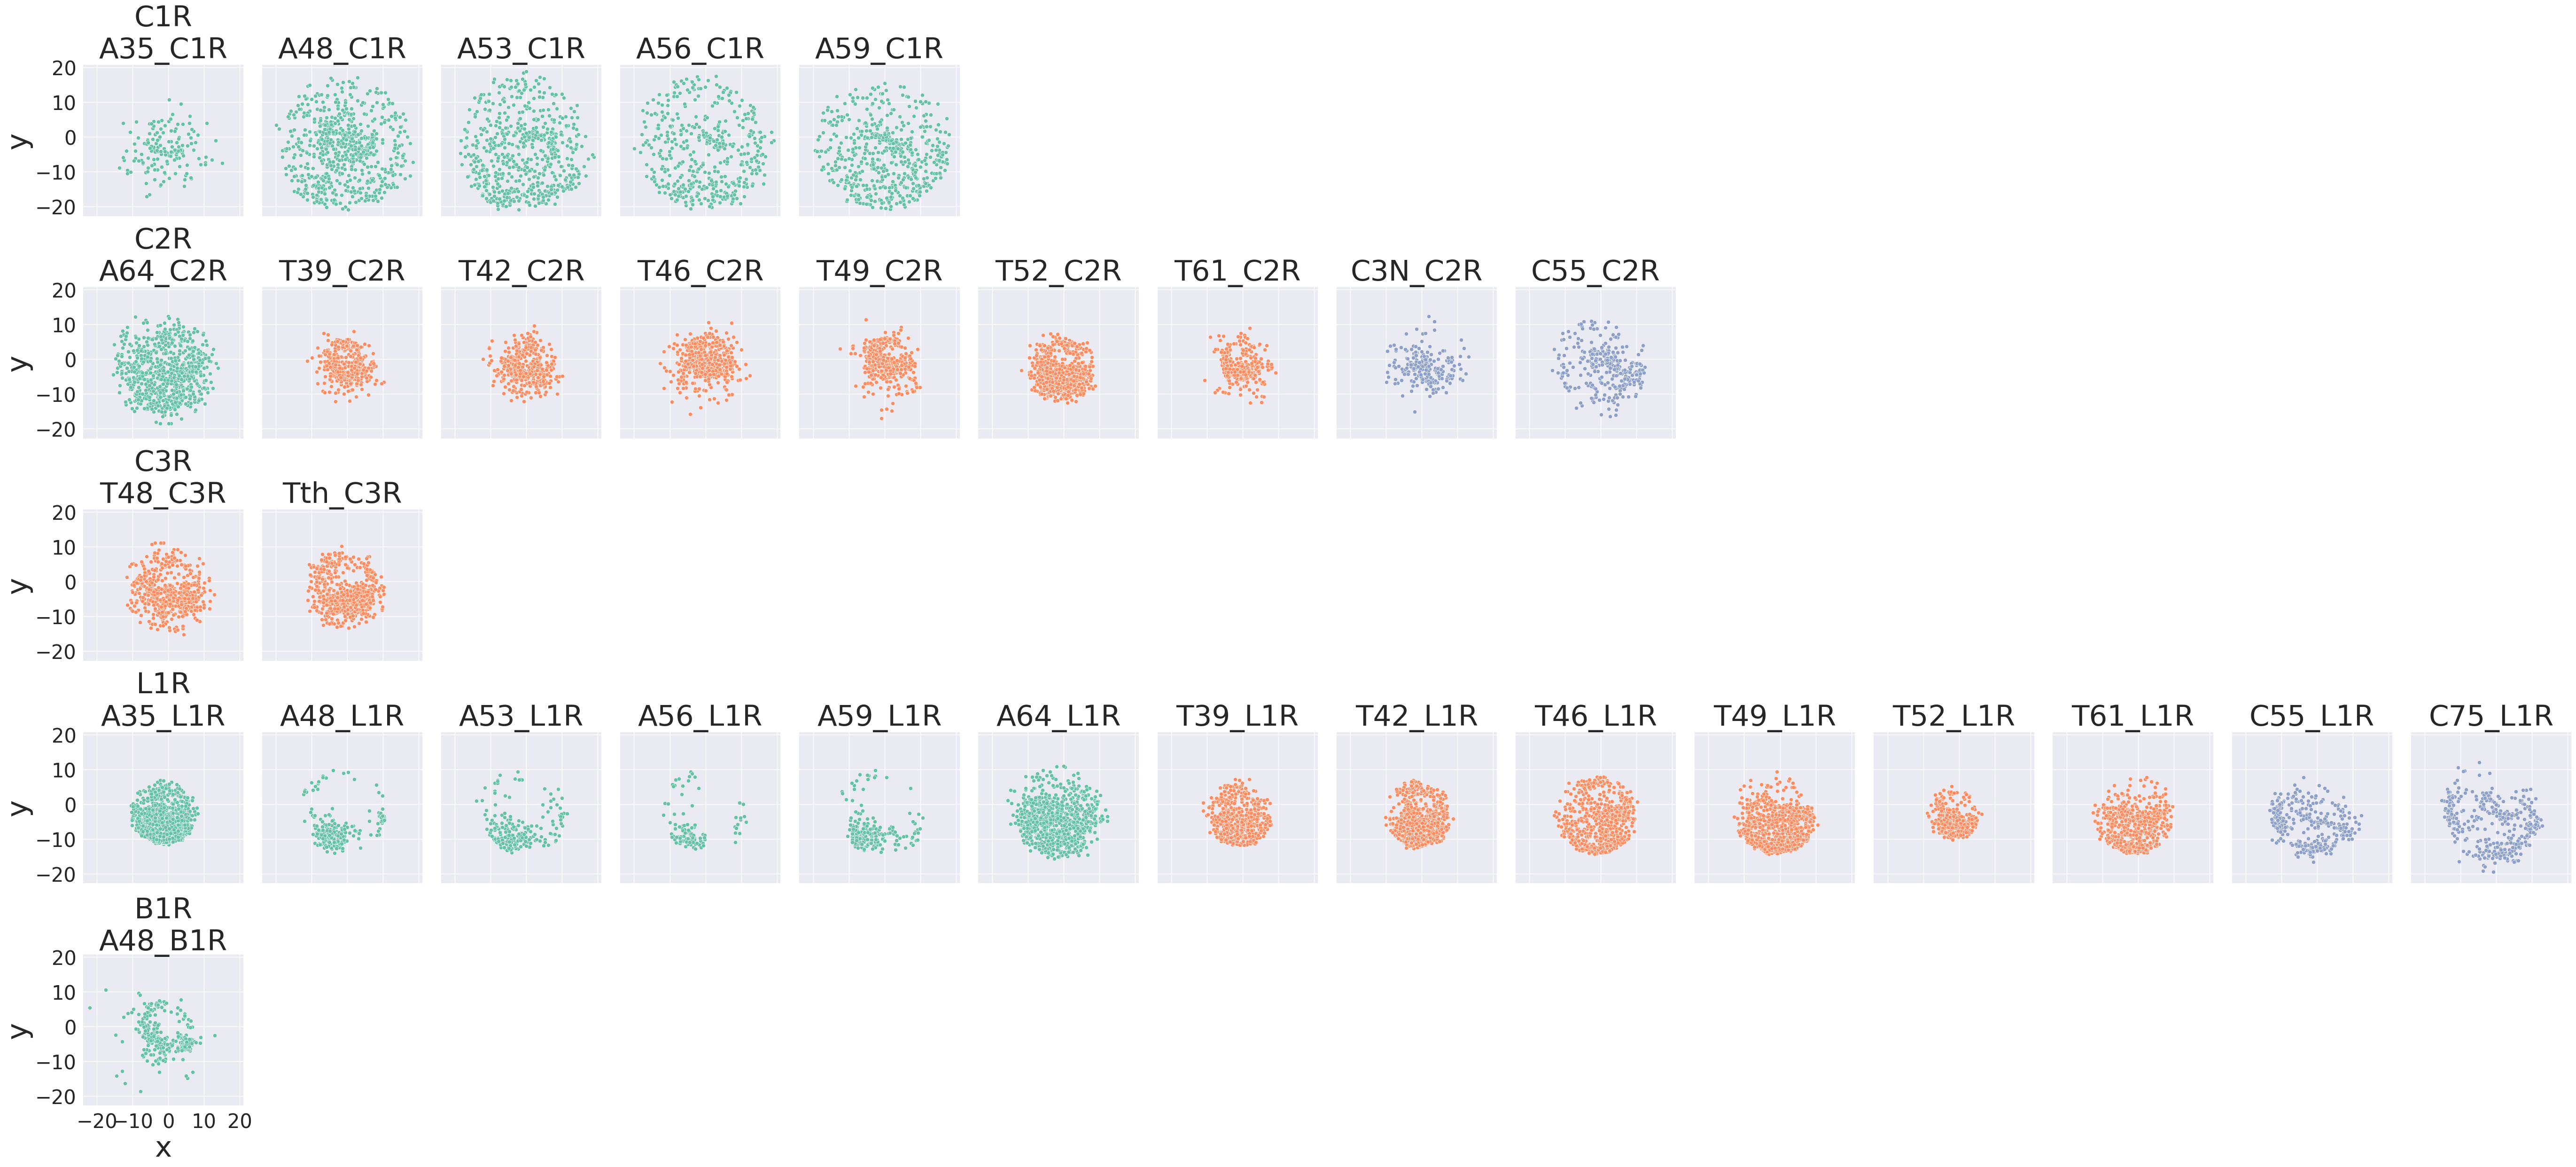

In [14]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(5, 14, figsize=(55, 25), sharex=True, sharey=True)

C1 = 0
C2 = 0
C3 = 0
L = 0
B = 0

palette = sns.color_palette("Set2", 3)

color = [palette[0]]*len(structures_alexa) + [palette[1]]*len(structures_atto) + [palette[2]] * len(structures_lumiprobe)

for i, structure in enumerate(structures):
        
    if structure[4:6] == 'C1':
                
        sns.scatterplot(data=positions_df.loc[positions_df['Name'] == structure], 
                        x="x", y="y", color=color[i], ax=ax[0, C1])
                
        ax[0, C1].set_title(structure, size=44)
        ax[0, 0].set_title('C1R\nA35_C1R', size=44)
        
        C1 += 1
        
    if structure[4:6] == 'C2':
        
        sns.scatterplot(data=positions_df.loc[positions_df['Name'] == structure], 
                        x="x", y="y", color=color[i], ax=ax[1, C2])
        
        ax[1, C2].set_title(structure, size=44)
        ax[1, 0].set_title(f'C2R\nA64_C2R', size=44)
        
        C2 += 1
        
    if structure[4:6] == 'C3':
        
        sns.scatterplot(data=positions_df.loc[positions_df['Name'] == structure], 
                        x="x", y="y", color=color[i], ax=ax[2, C3])
        
        ax[2, C3].set_title(structure, size=44)
        ax[2, 0].set_title('C3R\nT48_C3R', size=44)
        
        C3 += 1
        
    elif structure[4:6] == 'L1':
        
        sns.scatterplot(data=positions_df.loc[positions_df['Name'] == structure], 
                        x="x", y="y", color=color[i], ax=ax[3, L])
        
        ax[3, L].set_title(structure, size=44)
        ax[3, 0].set_title('L1R\nA35_L1R', size=44)

        
        L += 1
        
    
    elif structure[4:6] == 'B1':
        
        sns.scatterplot(data=positions_df.loc[positions_df['Name'] == structure], 
                        x="x", y="y", color=color[i], ax=ax[4, B])
        
        ax[4, 0].set_title(f'B1R\n{structure}', size=44)
        
        B += 1

for rows in range(0, 5):
    for cols in range(0, 14):
        
        ax[rows, cols].set_xlabel('x', fontsize=44)
        ax[rows, 0].set_ylabel('y', fontsize=44)
        
        for label in (ax[rows, cols].get_xticklabels() + ax[rows, cols].get_yticklabels()):
            label.set_fontsize(30)
            
for i in range(5, 14):
    ax[0, i].axis('off')
    
for i in range(9, 14):
    ax[1, i].axis('off')
    
for i in range(2, 14):
    ax[2, i].axis('off')
    
for i in range(1, 14):
    ax[4, i].axis('off')

plt.xticks(np.arange(-20, 30, step=10)) 
plt.yticks(np.arange(-20, 30, step=10))
    
fig.tight_layout()

# plt.savefig('Rotamer_libraries_scatterplot_cutoff10.png', dpi=320)


## Fig S5

In [15]:
# Define Universe

# Usare O91 x AlexaFluor
structures_alexa = ['A35_C1R', 'A48_C1R', 'A53_C1R', 'A56_C1R', 'A59_C1R', 'A64_C2R', 
                   'A35_L1R', 'A48_L1R', 'A48_B1R', 'A53_L1R', 'A56_L1R', 'A59_L1R', 'A64_L1R']

# Usare C7 x ATTO
structures_atto = ['T39_C2R', 'T39_L1R', 'T42_C2R', 'T42_L1R', 'T46_L1R', 'T46_C2R', 'T48_C3R', 
                   'T49_C2R', 'T49_L1R', 'T52_C2R', 'T52_L1R', 'T61_C2R', 'T61_L1R', 'Tth_C3R']


structures_lumiprobe = ['C3N_C2R', 'C55_C2R', 'C55_L1R', 'C75_L1R']

structures = structures_alexa + structures_atto + structures_lumiprobe

x, y, z = [], [], []

name, manufacturer, linker = [], [], []

for structure in structures:
    
    print(structure)
    
    u = MDAnalysis.Universe(f'lib/{structure}.pdb', f'lib/{structure}_cutoff20.dcd')
    
    if structure[0] == 'A': 
        
        pos = u.select_atoms('all and not (resname ACE or resname NHE) and name O91')

    elif structure[0] == 'T': 
        
        pos = u.select_atoms('all and not (resname ACE or resname NHE) and name C7')
        
    elif structure[0] == 'C': 
        
        pos = u.select_atoms('all and not (resname ACE or resname NHE) and name C10')
    
    for _ in u.trajectory:
    
        x.append(pos.positions[0][0])
        y.append(pos.positions[0][1])
        z.append(pos.positions[0][2])

    name = np.append(name, np.repeat(structure, len(u.trajectory)))
    linker = np.append(linker, np.repeat(structure[4:7], len(u.trajectory)))
    
    if structure[0] == 'A':
        print('A')
        manufacturer = np.append(manufacturer, np.repeat('AlexaFluor', len(u.trajectory)))
    
    elif structure[0] == 'T':
        print('T')
        manufacturer = np.append(manufacturer, np.repeat('ATTO', len(u.trajectory)))
        
    elif structure[0] == 'C':
        print('C')
        manufacturer = np.append(manufacturer, np.repeat('Lumiprobe', len(u.trajectory)))
        
positions_df = pd.DataFrame({'Name': name, 'Manufacturer': manufacturer, 'Linker': linker,
                                 'x': x, 'y': y, 'z': z})

A35_C1R
A
A48_C1R
A
A53_C1R
A
A56_C1R
A
A59_C1R
A
A64_C2R
A
A35_L1R
A
A48_L1R
A
A48_B1R
A
A53_L1R
A
A56_L1R
A
A59_L1R
A
A64_L1R
A
T39_C2R
T
T39_L1R
T
T42_C2R
T
T42_L1R
T
T46_L1R
T
T46_C2R
T
T48_C3R
T
T49_C2R
T
T49_L1R
T
T52_C2R
T
T52_L1R
T
T61_C2R
T
T61_L1R
T
Tth_C3R
T
C3N_C2R
C
C55_C2R
C
C55_L1R
C
C75_L1R
C


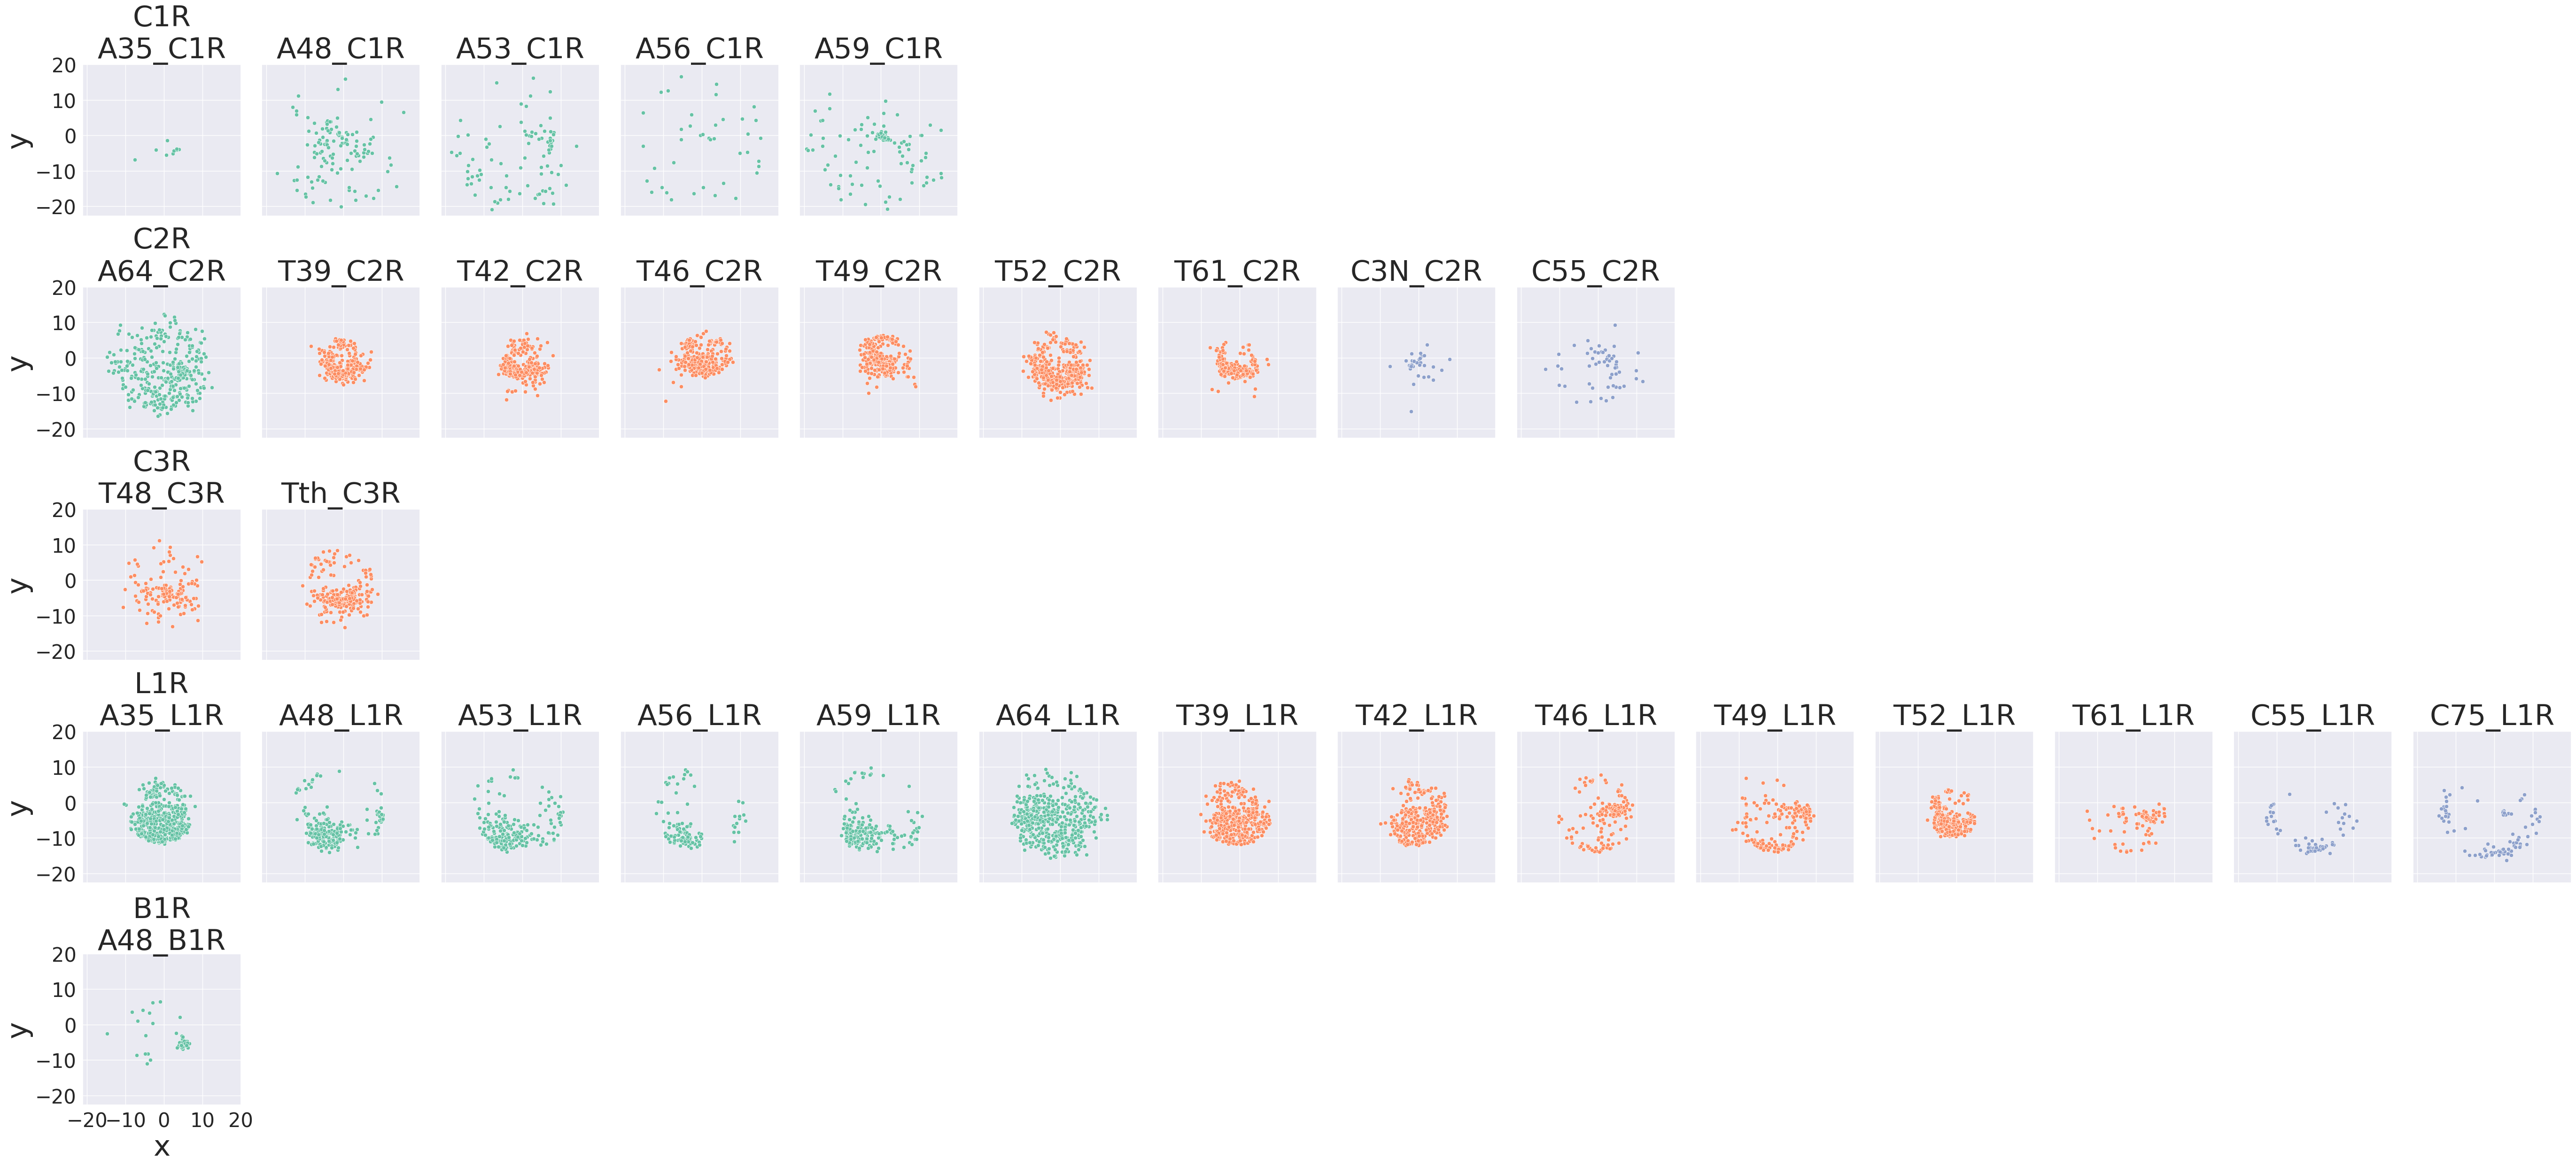

In [16]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(5, 14, figsize=(55, 25), sharex=True, sharey=True)

C1 = 0
C2 = 0
C3 = 0
L = 0
B = 0

palette = sns.color_palette("Set2", 3)


for structure in structures:
    
#     Select color
    if structure[0] == 'A':
        color = palette[0]
        
    elif structure[0] == 'T':
        color = palette[1]
        
    elif structure[0] == 'C':
        color = palette[2]
    
        
    if structure[4:6] == 'C1':
        
        sns.scatterplot(data=positions_df.loc[positions_df['Name'] == structure], 
                        x="x", y="y", color=color, ax=ax[0, C1])
        
        ax[0, C1].set_title(structure, size=44)
        ax[0, 0].set_title('C1R\nA35_C1R', size=44)
        
        C1 += 1
        
    if structure[4:6] == 'C2':
        
        sns.scatterplot(data=positions_df.loc[positions_df['Name'] == structure], 
                        x="x", y="y", color=color, ax=ax[1, C2])
        
        ax[1, C2].set_title(structure, size=44)
        ax[1, 0].set_title('C2R\nA64_C2R', size=44)
        
        C2 += 1
        
    if structure[4:6] == 'C3':
        
        sns.scatterplot(data=positions_df.loc[positions_df['Name'] == structure], 
                        x="x", y="y", color=color, ax=ax[2, C3])
        
        ax[2, C3].set_title(structure, size=44)
        ax[2, 0].set_title('C3R\nT48_C3R', size=44)
        
        C3 += 1
        
    elif structure[4] == 'L':
        
        sns.scatterplot(data=positions_df.loc[positions_df['Name'] == structure], 
                        x="x", y="y", color=color, ax=ax[3, L])
        
        ax[3, L].set_title(structure, size=44)
        ax[3, 0].set_title('L1R\nA35_L1R', size=44)

        
        L += 1
        
    
    elif structure[4] == 'B':
        
        sns.scatterplot(data=positions_df.loc[positions_df['Name'] == structure], 
                        x="x", y="y", color=color, ax=ax[4, B])
        
        ax[4, 0].set_title(f'B1R\n{structure}', size=44)
        
        B += 1

for rows in range(0, 5):
    for cols in range(0, 14):
        
        ax[rows, cols].set_xlabel('x', fontsize=44)
        ax[rows, 0].set_ylabel('y', fontsize=44)
        
        for label in (ax[rows, cols].get_xticklabels() + ax[rows, cols].get_yticklabels()):
            label.set_fontsize(30)
            
for i in range(5, 14):
    ax[0, i].axis('off')
    
for i in range(9, 14):
    ax[1, i].axis('off')
    
for i in range(2, 14):
    ax[2, i].axis('off')
    
for i in range(1, 14):
    ax[4, i].axis('off')

plt.xticks(np.arange(-20, 30, step=10)) 
plt.yticks(np.arange(-20, 30, step=10))

fig.tight_layout()

# plt.savefig('Rotamer_libraries_scatterplot_cutoff20.png', dpi=320)

## Fig S6

In [17]:
# Define Universe

# Usare O91 x AlexaFluor
structures_alexa = ['A35_C1R', 'A48_C1R', 'A53_C1R', 'A56_C1R', 'A59_C1R', 'A64_C2R', 
                   'A35_L1R', 'A48_L1R', 'A48_B1R', 'A53_L1R', 'A56_L1R', 'A59_L1R', 'A64_L1R']

# Usare C7 x ATTO
structures_atto = ['T39_C2R', 'T39_L1R', 'T42_C2R', 'T42_L1R', 'T46_L1R', 'T46_C2R', 'T48_C3R', 
                   'T49_C2R', 'T49_L1R', 'T52_C2R', 'T52_L1R', 'T61_C2R', 'T61_L1R', 'Tth_C3R']


structures_lumiprobe = ['C3N_C2R', 'C55_C2R', 'C55_L1R', 'C75_L1R']

structures = structures_alexa + structures_atto + structures_lumiprobe

x, y, z = [], [], []

name, manufacturer, linker = [], [], []

for structure in structures:
    
    u = MDAnalysis.Universe(f'lib/{structure}.pdb', f'lib/{structure}_cutoff30.dcd')
    
    if structure[0] == 'A': 
        
        pos = u.select_atoms('all and not (resname ACE or resname NHE) and name O91')

    elif structure[0] == 'T': 
        
        pos = u.select_atoms('all and not (resname ACE or resname NHE) and name C7')
        
    elif structure[0] == 'C': 
        
        pos = u.select_atoms('all and not (resname ACE or resname NHE) and name C10')
    
    for _ in u.trajectory:
    
        x.append(pos.positions[0][0])
        y.append(pos.positions[0][1])
        z.append(pos.positions[0][2])

    name = np.append(name, np.repeat(structure, len(u.trajectory)))
    linker = np.append(linker, np.repeat(structure[4:7], len(u.trajectory)))
    
    if structure[0] == 'A':
        
        manufacturer = np.append(manufacturer, np.repeat('AlexaFluor', len(u.trajectory)))
    
    elif structure[0] == 'T':
        
        manufacturer = np.append(manufacturer, np.repeat('ATTO', len(u.trajectory)))
        
    elif structure[0] == 'C':
        
        manufacturer = np.append(manufacturer, np.repeat('Lumiprobe', len(u.trajectory)))
        
positions_df = pd.DataFrame({'Name': name, 'Manufacturer': manufacturer, 'Linker': linker,
                                 'x': x, 'y': y, 'z': z})

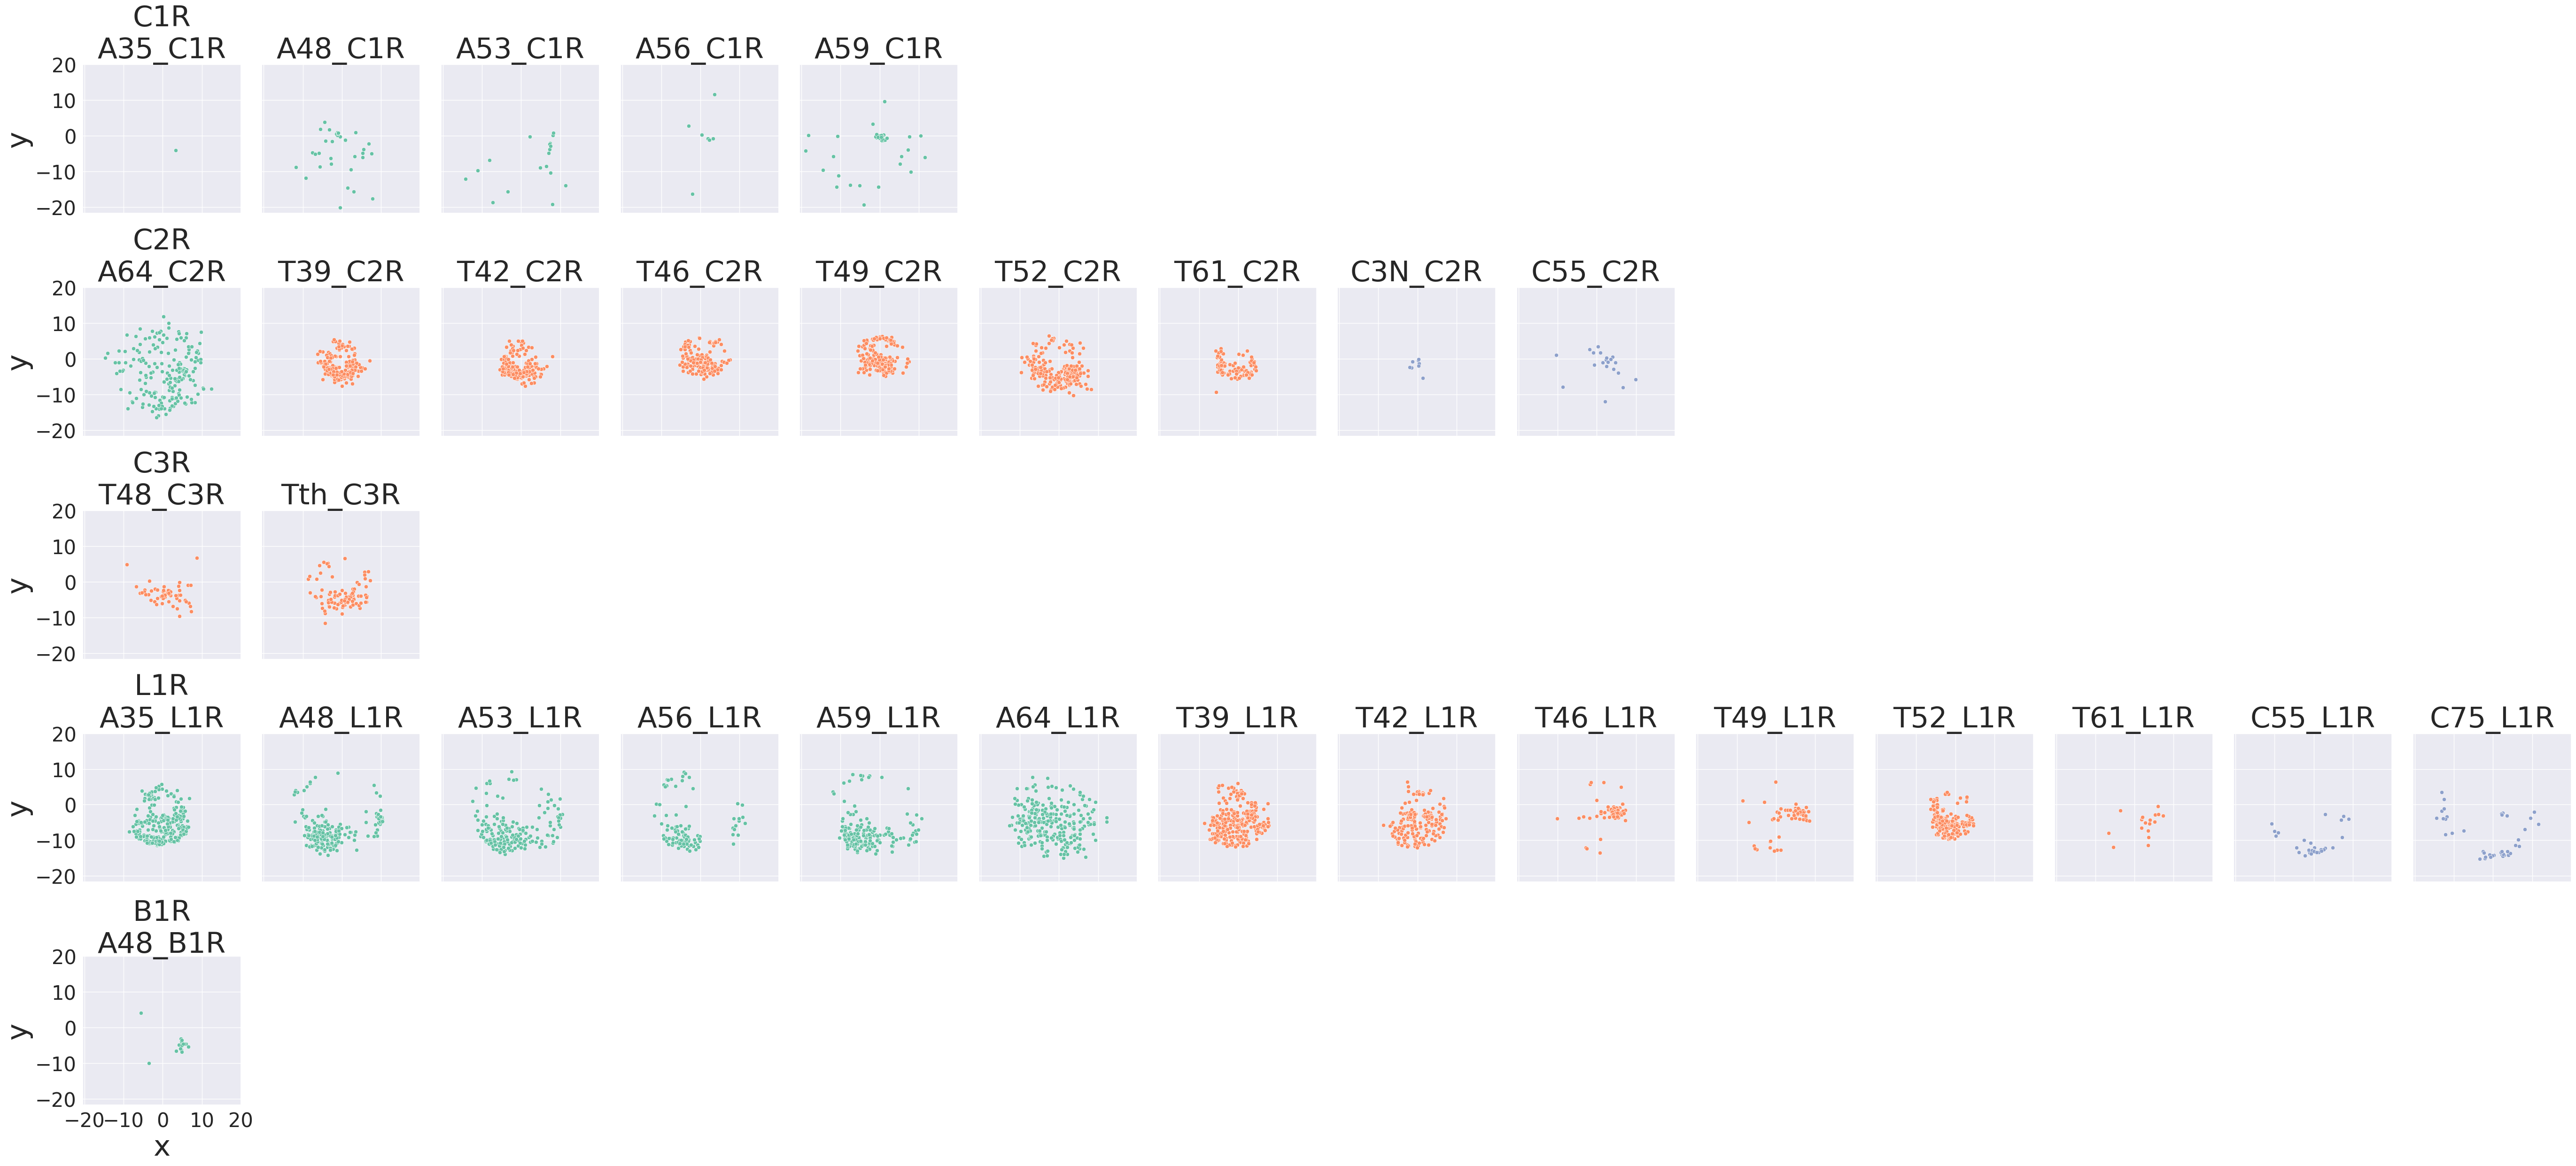

In [18]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(5, 14, figsize=(55, 25), sharex=True, sharey=True)

C1 = 0
C2 = 0
C3 = 0
L = 0
B = 0

palette = sns.color_palette("Set2", 3)


for structure in structures:
    
#     Select color
    if structure[0] == 'A':
        color = palette[0]
        
    elif structure[0] == 'T':
        color = palette[1]
        
    elif structure[0] == 'C':
        color = palette[2]
    
        
    if structure[4:6] == 'C1':
        
        sns.scatterplot(data=positions_df.loc[positions_df['Name'] == structure], 
                        x="x", y="y", color=color, ax=ax[0, C1])
        
        ax[0, C1].set_title(structure, size=44)
        ax[0, 0].set_title('C1R\nA35_C1R', size=44)
        
        C1 += 1
        
    if structure[4:6] == 'C2':
        
        sns.scatterplot(data=positions_df.loc[positions_df['Name'] == structure], 
                        x="x", y="y", color=color, ax=ax[1, C2])
        
        ax[1, C2].set_title(structure, size=44)
        ax[1, 0].set_title('C2R\nA64_C2R', size=44)
        
        C2 += 1
        
    if structure[4:6] == 'C3':
        
        sns.scatterplot(data=positions_df.loc[positions_df['Name'] == structure], 
                        x="x", y="y", color=color, ax=ax[2, C3])
        
        ax[2, C3].set_title(structure, size=44)
        ax[2, 0].set_title('C3R\nT48_C3R', size=44)
        
        C3 += 1
        
    elif structure[4] == 'L':
        
        sns.scatterplot(data=positions_df.loc[positions_df['Name'] == structure], 
                        x="x", y="y", color=color, ax=ax[3, L])
        
        ax[3, L].set_title(structure, size=44)
        ax[3, 0].set_title('L1R\nA35_L1R', size=44)

        
        L += 1
        
    
    elif structure[4] == 'B':
        
        sns.scatterplot(data=positions_df.loc[positions_df['Name'] == structure], 
                        x="x", y="y", color=color, ax=ax[4, B])
        
        ax[4, 0].set_title(f'B1R\n{structure}', size=44)
        
        B += 1

for rows in range(0, 5):
    for cols in range(0, 14):
        
        ax[rows, cols].set_xlabel('x', fontsize=44)
        ax[rows, 0].set_ylabel('y', fontsize=44)
        
        for label in (ax[rows, cols].get_xticklabels() + ax[rows, cols].get_yticklabels()):
            label.set_fontsize(30)
            
for i in range(5, 14):
    ax[0, i].axis('off')
    
for i in range(9, 14):
    ax[1, i].axis('off')
    
for i in range(2, 14):
    ax[2, i].axis('off')
    
for i in range(1, 14):
    ax[4, i].axis('off')

plt.xticks(np.arange(-20, 30, step=10)) 
plt.yticks(np.arange(-20, 30, step=10))

fig.tight_layout()

# plt.savefig('Rotamer_libraries_scatterplot_cutoff30.png', dpi=320)